# My Profile Photo

### How did I make my profile photo?

Combining my appreciation for quantum physics and art, I used neural style transfer to create a unique profile picture. I blended the mathematical notation of quantum states, represented by the bra-ket notation `<Ψ|Φ>`, with the distinctive style of my favorite artist, Picasso. The result is a fusion of abstract art and scientific elegance, where the deep understanding of quantum mechanics meets the vibrant, fragmented forms of Picasso’s artwork, all encapsulated in a personal profile image.


In [1]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [2]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [3]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [4]:
style_path = tf.keras.utils.get_file("picture.jpg","https://artucky.com/cdn/shop/articles/aglayan-kadin-picasso-hikayesi.jpg?v=1655806799")
content_path = tf.keras.utils.get_file('braket.jpg', 'https://i1.sndcdn.com/artworks-000005546993-cw3y5r-t500x500.jpg')

101701/101701 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
7895/7895 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [5]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [6]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

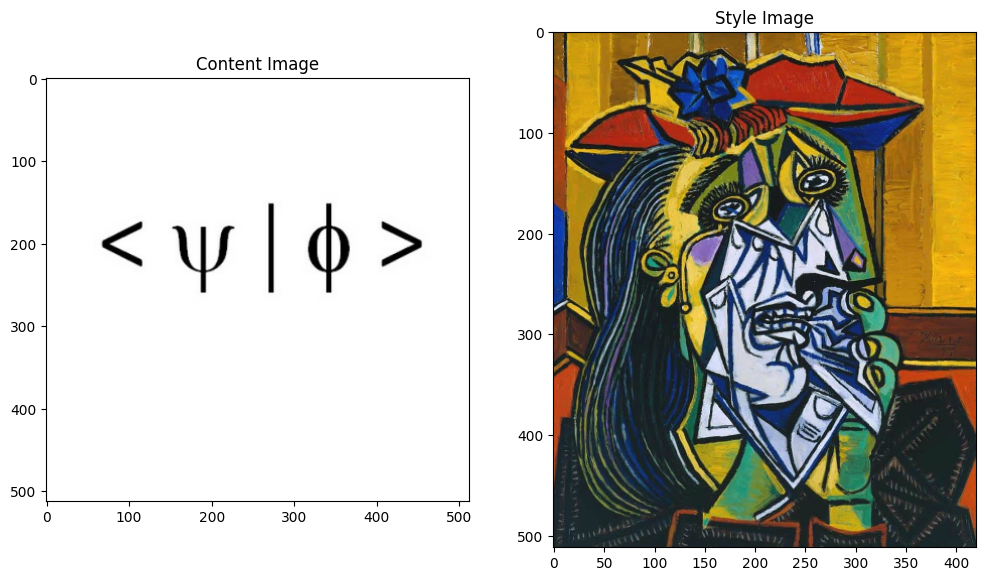

In [7]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

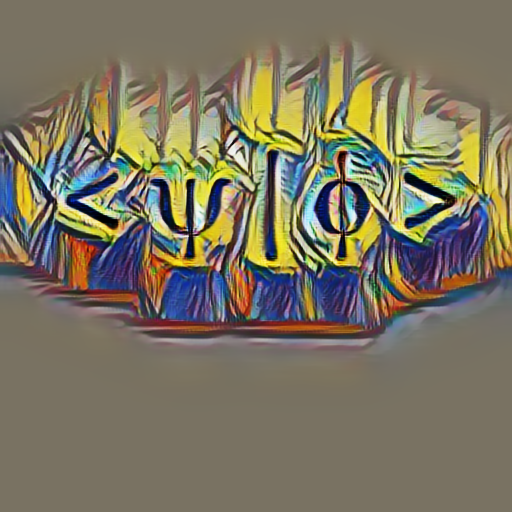

In [8]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)